# 1. Importation des librairies

In [1]:
# 1. Importation des librairies

In [2]:
import numpy as np

In [3]:
import pandas as pd

# 2. Chargement des données

In [4]:
# chargement des données

In [5]:
data = pd.read_csv('Data/studentscores.csv')

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des données

In [7]:
# 3. Analyse des données

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data['Hours'].max()

np.float64(9.2)

In [11]:
data['Hours'].max()

np.float64(9.2)

In [12]:
data['Hours'].min()

np.float64(1.1)

In [13]:
print(data['Hours'].max())

9.2


In [14]:
print(data['Scores'].max())

95


In [15]:
print("Max Scores : ",data['Scores'].max())

Max Scores :  95


In [16]:
print("Min Scores : ",data['Scores'].min())

Min Scores :  17


# 4. Division des données

## Variables indep et dep

In [17]:
x = data.iloc[: , :-1].values
y = data.iloc[: , -1].values

In [18]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 4.1 Separation des données: Train et Test

In [20]:
#X_train, X_test, Y_train, Y_test
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split (x,y, test_size=0.25, random_state=40)

In [26]:
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("Y_train Shape :", Y_train.shape)
print("Y_test Shape :", Y_test.shape)

X_train Shape : (18, 1)
X_test Shape : (7, 1)
Y_train Shape : (18,)
Y_test Shape : (7,)


# 5.Construire un modèle

In [29]:
# Importer l'algorithme de la regression lineaire
from sklearn.linear_model import LinearRegression

In [30]:
modele_lineaire = LinearRegression()

In [32]:
# Entrainement du modèle
modele_lineaire.fit(X_train, Y_train)

LinearRegression()

In [35]:
# Faire la prediction
y_scores_predicts = modele_lineaire.predict(X_test)

In [36]:
y_scores_predicts

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [37]:
Y_test

array([95, 86, 17, 69, 42, 75, 54])

In [38]:
resultats = pd.DataFrame(Y_test, y_scores_predicts)

In [39]:
resultats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [41]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
print("MSE de la progression lineaire :", mean_squared_error(
    Y_test, y_scores_predicts)
     )

MSE de la progression lineaire : 51.90159659147337


In [44]:
print("R2 score de la regression lineaire :", r2_score(
    Y_test, y_scores_predicts)
     )

R2 score de la regression lineaire : 0.9168569951293908


# 6. Visualisation de Resultats

In [45]:
import matplotlib.pyplot as plt

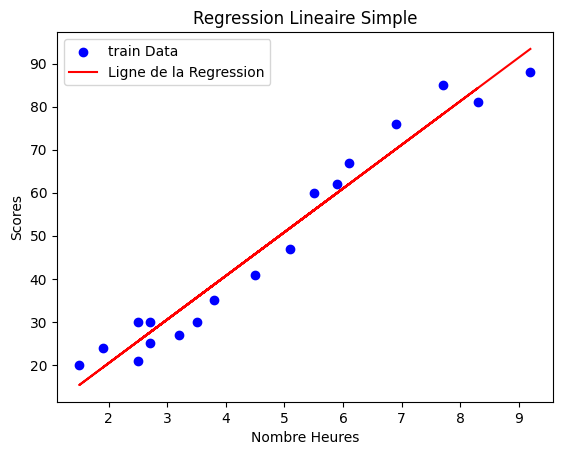

In [48]:
plt.scatter(X_train, Y_train, color='blue', label='train Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de la Regression')
plt.xlabel('Nombre Heures')
plt.ylabel('Scores')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

# 7. Predition Simple

In [49]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [50]:
resultats = pd.DataFrame({'y-score-reel': Y_test, 'y-scores-predicts':y_scores_predicts})
resultats

,y-score-reel,y-scores-predicts
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [51]:
y_scores_predicts

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [52]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [57]:
print(modele_lineaire.predict([[2.5]]))

[25.49124]


In [58]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [59]:
resultats['difference'] = resultats['y-score-reel'] = resultats['y-scores-predicts']

In [60]:
print(resultats)

   y-score-reel  y-scores-predicts  difference
0     90.348621          90.348621   90.348621
1     79.201258          79.201258   79.201258
2     11.303688          11.303688   11.303688
3     75.147672          75.147672   75.147672
4     33.598413          33.598413   33.598413
5     86.295034          86.295034   86.295034
6     48.799361          48.799361   48.799361
